In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import stats

**Data inroduction**

This dataset contains metadata for YouTube videos and channels. It includes 9 direct features and 13 indirect features that provide information about total views, channel views, likes, dislikes, comments, subscribers, and elapsed time. By analyzing these features, we can gain insights into the statistical relationship between videos and gain information about topic selection. We can also develop models that show how different types of content drive viewership and identify the most popular styles or topics within YouTube's vast catalog. In addition, this data offers a very good opportunity to study consumer behavior and understand what drives people to watch specific videos or appreciate certain channels more than others. Finally, this dataset is completely open source, making it a valuable resource for anyone looking to improve their content and better understand their audience.

In [135]:
path = 'YouTubeDataset_withChannelElapsed.csv'
data = pd.read_csv(path, parse_dates=['videoPublished'])

**Features overview**

totalviews/channelelapsedtime	- Ratio of total views to channel elapsed time. (Ratio)
channelViewCount -	Total number of views for the channel. (Integer)
likes/subscriber -	Ratio of likes to subscribers. (Ratio)
views/subscribers -	Ratio of views to subscribers. (Ratio)
subscriberCount - Total number of subscribers for the channel. (Integer)
dislikes/views -	Ratio of dislikes to views. (Ratio)
comments/subscriber -	Ratio of comments to subscribers. (Ratio)
channelCommentCount -	Total number of comments for the channel. (Integer)
likes/dislikes -	Ratio of likes to dislikes. (Ratio)
comments/views -	Ratio of comments to views. (Ratio)
dislikes/subscriber -	Ratio of dislikes to subscribers. (Ratio)
totviews/totsubs -	Ratio of total views to total subscribers. (Ratio)
views/elapsedtime -	Ratio of views to elapsed time. (Ratio)
elapsed time - average time spent watching a video per user.(Integer)
(Taken from kaggle)

In [136]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575610 entries, 0 to 575609
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   index                          575610 non-null  int64              
 1   totalviews/channelelapsedtime  575610 non-null  float64            
 2   channelId                      575610 non-null  object             
 3   videoCategoryId                575610 non-null  int64              
 4   channelViewCount               575610 non-null  int64              
 5   likes/subscriber               575610 non-null  float64            
 6   views/subscribers              575610 non-null  float64            
 7   videoCount                     575610 non-null  int64              
 8   subscriberCount                575610 non-null  int64              
 9   videoId                        575610 non-null  object             
 10  dislikes

In [137]:
data.head(10)

,index,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,...,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
0,0,0.165199,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.555556,95.111111,30,18,--DwgB78t-c,...,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19 18:38:28+00:00,0
1,1,1.133820,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.239130,59.326087,51,184,--NZRkXBV7k,...,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30 04:04:40+00:00,2
2,2,0.668120,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023669,10.289941,72,338,--hoQ2sGG4M,...,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07 06:51:10+00:00,2
3,3,25.653505,UCeKHMeUlcLNPLCLUfZUQI2w,26,2116722,0.007301,0.884178,172,22051,--sBoaqBlzA,...,0.000513,12306.523256,54096,161,6,0.000272,95.992109,0.360415,2011-08-04 01:07:38+00:00,10
4,4,52.773778,UCNWPDyaWf2eAHnofFLSnEMg,20,1649075,0.004545,10.004545,2777,220,--7h1S4neDM,...,0.000000,593.833273,30120,1,0,0.000000,7495.795455,0.073074,2014-04-29 15:44:44+00:00,0
5,5,2.272839,UCdo4nsIhLYABKSnU9IMBvcw,26,211649,0.017241,56.025862,53,232,--F672jfCMo,...,0.000000,3993.377358,75480,4,0,0.000000,912.280172,0.172205,2009-02-24 02:06:10+00:00,0
6,6,2.530921,UCZNDDbxNipTnfrSH4NpuoOw,27,209621,0.091743,77.275229,22,109,--ezS5q-mZg,...,0.000831,9528.227273,66384,10,2,0.018349,1923.128440,0.126883,2010-03-09 20:34:05+00:00,7
7,7,874.689462,UCgg5HS1oVuMSoGRPuHo-b_A,10,68876547,0.000661,0.111082,1159,75629,--XT8O4T3Wc,...,0.000357,59427.564280,63792,50,0,0.000000,910.716088,0.131694,2010-06-26 14:48:04+00:00,3
8,8,67.125552,UCCNZDSGjG6xEoz2lv4FThMQ,20,4009812,0.002050,0.161677,813,40482,--Qgwg7mGZY,...,0.005500,4932.118081,46752,83,4,0.000099,99.051727,0.139994,2012-06-05 12:37:29+00:00,36
9,9,0.914872,UCW0Dk2N7209dicPGgYNcnGg,20,45363,0.722222,502.255556,2,90,--_I8vffnIw,...,0.000133,22681.500000,38064,65,36,0.400000,504.033333,1.187553,2013-06-01 18:40:56+00:00,6


In a quick glance at the data we can see that there are some negative values in the dataframe. In the likes/dislikes column, the first 10 rows have negative value in a ratio representation column. It is wrong, therefore, I will remove any negative value in the dataframe. This is because most of the columns are representing ratio or a counter of some variable. Those who are not, are representing other objects such as date or unique id.

In [138]:
#Check if there are any duplicated rows and how many of them
#First we will drop the index column
data = data.drop(['index'], axis=1)
#Now we'll check for duplicates
data_len = len(data)
print(f'Number of rows in original dataset is {data_len}')
data_no_duplicates_len = len(data.drop_duplicates())
print(f'Number of rows in the no duplicates dataset is {data_no_duplicates_len}')
print(f'There are {data_len - data_no_duplicates_len} duplicated rows')

Number of rows in original dataset is 575610
Number of rows in the no duplicates dataset is 556424
There are 19186 duplicated rows


In [139]:
#Count how many below zero values there are in every relevant column
numeric_df = data[['totalviews/channelelapsedtime', 'channelViewCount', 'likes/subscriber', 'views/subscribers', 'videoCount', 'subscriberCount', 'dislikes/views', 'channelelapsedtime', 'comments/subscriber', 'likes/views', 'channelCommentCount', 'videoViewCount', 'likes/dislikes', 'comments/views', 'totvideos/videocount', 'dislikes/subscriber','totviews/totsubs','views/elapsedtime','VideoCommentCount']]

cols_negative = []
for col in numeric_df:
    num_negative = len(numeric_df[numeric_df[col] < 0 ])
    if num_negative > 0 :
        cols_negative.append(col)
    print(f'In column {col} there are {num_negative} values below zero')
    print(f'That is {round((num_negative / len(numeric_df)) * 100, 2)}% of the rows')

In column totalviews/channelelapsedtime there are 0 values below zero
That is 0.0% of the rows
In column channelViewCount there are 0 values below zero
That is 0.0% of the rows
In column likes/subscriber there are 28341 values below zero
That is 4.92% of the rows
In column views/subscribers there are 17915 values below zero
That is 3.11% of the rows
In column videoCount there are 0 values below zero
That is 0.0% of the rows
In column subscriberCount there are 0 values below zero
That is 0.0% of the rows
In column dislikes/views there are 11463 values below zero
That is 1.99% of the rows
In column channelelapsedtime there are 0 values below zero
That is 0.0% of the rows
In column comments/subscriber there are 29121 values below zero
That is 5.06% of the rows
In column likes/views there are 11463 values below zero
That is 1.99% of the rows
In column channelCommentCount there are 0 values below zero
That is 0.0% of the rows
In column videoViewCount there are 104 values below zero
That is 

As we can see, in some columns there are no negative values, in some a small percentage of the values is negative and in the "likes/dislikes" column, almost every value (96.5%) is negative. Therefore, we will drop this column because it won't help in the analysis.
The columns in which there is a small percentage of the values with a negative value, will be dealt with in a manner of changing the negative values with the median value of this column.

In [140]:
#Dropping likes/dislikes column
cols_negative.remove('likes/dislikes')
data = data.drop(['likes/dislikes'], axis=1)
numeric_df = numeric_df.drop(['likes/dislikes'], axis=1)

In [141]:
#Replacing negative values with median
for col in cols_negative:
    temp_df = data.loc[data[col] >= 0]
    col_median = temp_df[col].median()
    data.loc[data[col] < 0, col] = col_median
    numeric_df.loc[numeric_df[col] < 0, col] = col_median

data.head(10)

,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,dislikes/views,...,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
0,0.165199,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.555556,95.111111,30,18,--DwgB78t-c,0.000584,...,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19 18:38:28+00:00,0
1,1.133820,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.239130,59.326087,51,184,--NZRkXBV7k,0.000275,...,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30 04:04:40+00:00,2
2,0.668120,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023669,10.289941,72,338,--hoQ2sGG4M,0.000288,...,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07 06:51:10+00:00,2
3,25.653505,UCeKHMeUlcLNPLCLUfZUQI2w,26,2116722,0.007301,0.884178,172,22051,--sBoaqBlzA,0.000308,...,0.000513,12306.523256,54096,161,6,0.000272,95.992109,0.360415,2011-08-04 01:07:38+00:00,10
4,52.773778,UCNWPDyaWf2eAHnofFLSnEMg,20,1649075,0.004545,10.004545,2777,220,--7h1S4neDM,0.000000,...,0.000000,593.833273,30120,1,0,0.000000,7495.795455,0.073074,2014-04-29 15:44:44+00:00,0
5,2.272839,UCdo4nsIhLYABKSnU9IMBvcw,26,211649,0.017241,56.025862,53,232,--F672jfCMo,0.000000,...,0.000000,3993.377358,75480,4,0,0.000000,912.280172,0.172205,2009-02-24 02:06:10+00:00,0
6,2.530921,UCZNDDbxNipTnfrSH4NpuoOw,27,209621,0.091743,77.275229,22,109,--ezS5q-mZg,0.000237,...,0.000831,9528.227273,66384,10,2,0.018349,1923.128440,0.126883,2010-03-09 20:34:05+00:00,7
7,874.689462,UCgg5HS1oVuMSoGRPuHo-b_A,10,68876547,0.000661,0.111082,1159,75629,--XT8O4T3Wc,0.000000,...,0.000357,59427.564280,63792,50,0,0.000000,910.716088,0.131694,2010-06-26 14:48:04+00:00,3
8,67.125552,UCCNZDSGjG6xEoz2lv4FThMQ,20,4009812,0.002050,0.161677,813,40482,--Qgwg7mGZY,0.000611,...,0.005500,4932.118081,46752,83,4,0.000099,99.051727,0.139994,2012-06-05 12:37:29+00:00,36
9,0.914872,UCW0Dk2N7209dicPGgYNcnGg,20,45363,0.722222,502.255556,2,90,--_I8vffnIw,0.000796,...,0.000133,22681.500000,38064,65,36,0.400000,504.033333,1.187553,2013-06-01 18:40:56+00:00,6


Now lets get some statistical info about our features

In [142]:
numeric_df.describe(include='all')

,totalviews/channelelapsedtime,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,dislikes/views,channelelapsedtime,comments/subscriber,likes/views,channelCommentCount,videoViewCount,comments/views,totvideos/videocount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,VideoCommentCount
count,575610.000000,5.756100e+05,575610.000000,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000,575610.000000,575610.000000,5.756100e+05,5.756100e+05,575610.000000,5.756100e+05,575610.000000,5.756100e+05,575610.000000,575610.000000
mean,713.682808,4.829119e+07,0.613066,309.446938,1204.464627,8.097598e+04,0.000548,67941.305267,0.190567,0.006291,7.312371e+02,5.883995e+04,0.001664,4.093184e+04,0.123880,1.726017e+03,1.517456,39.187530
std,6481.875213,4.630822e+08,2.784540,1584.235120,8303.754974,6.033393e+05,0.001618,20629.159278,1.462885,0.012398,2.724153e+04,1.230696e+06,0.005174,4.883611e+05,1.241430,4.211933e+03,31.451957,557.804842
min,0.000000,0.000000e+00,0.000000,0.000054,0.000000,0.000000e+00,0.000000,888.000000,0.000000,0.000000,0.000000e+00,1.002000e+03,0.000000,0.000000e+00,0.000000,0.000000e+00,0.009891,0.000000
25%,0.773417,5.045000e+04,0.004771,1.322979,17.000000,3.800000e+01,0.000000,51984.000000,0.000086,0.001409,0.000000e+00,2.206000e+03,0.000105,1.809573e+03,0.000000,3.969998e+02,0.045788,1.000000
50%,6.213229,4.086660e+05,0.036323,13.559633,70.000000,4.080000e+02,0.000185,68400.000000,0.003401,0.003019,2.000000e+00,4.809000e+03,0.000566,5.361013e+03,0.000415,8.865062e+02,0.106767,4.000000
75%,56.610846,3.616452e+06,0.273810,120.648028,336.000000,5.319000e+03,0.000554,85824.000000,0.045455,0.006357,2.300000e+01,1.526600e+04,0.001579,1.784933e+04,0.013707,1.829000e+03,0.347067,14.000000
max,683532.725598,2.379817e+10,505.000000,279803.000000,415500.000000,2.525311e+07,0.322981,108913.000000,485.000000,1.418500,3.953563e+06,5.008939e+08,1.003530,1.503287e+08,343.500000,1.672107e+06,11698.756213,191498.000000


**Data visualizations**

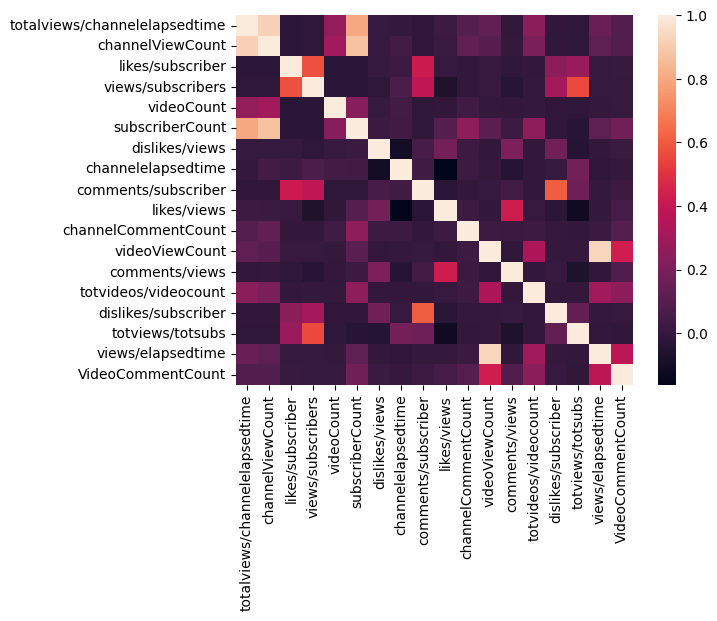

In [143]:
sns.heatmap(numeric_df.corr())
plt.show()

From the above heatmap, we can learn some pretty interesting insights about the data. for example : channelViewCount is pretty highly correlated with subscriberCount, which makes sense.

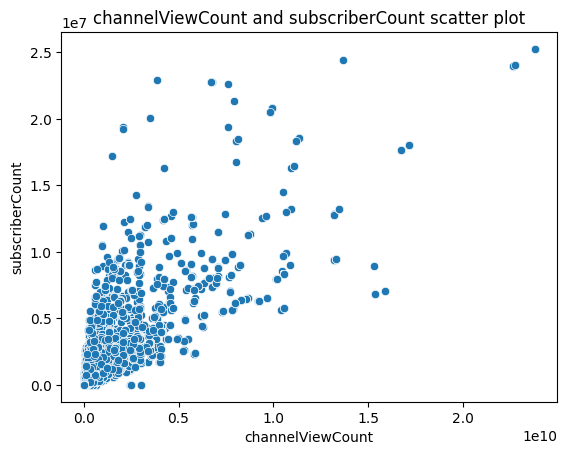

The correlation between channelViewCount and subscriberCount is 0.873875891459569


In [151]:
sns.scatterplot(data=data, x='channelViewCount', y='subscriberCount')
# plt.xlim([10,50])
# plt.ylim([10,50])
plt.title("channelViewCount and subscriberCount scatter plot")
plt.show()

#Correlation
x = data['channelViewCount']
y = data['subscriberCount']
print(f'The correlation between channelViewCount and subscriberCount is {x.corr(y)}')

We can see that these two features correlates positively, as the growth of views in a channel brings a growth in the subscribers count.

In [145]:
display(numeric_df)

,totalviews/channelelapsedtime,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,dislikes/views,channelelapsedtime,comments/subscriber,likes/views,channelCommentCount,videoViewCount,comments/views,totvideos/videocount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,VideoCommentCount
0,0.165199,14654,0.555556,95.111111,30,18,0.000584,88705,0.000000,0.005841,1,1712,0.000000,488.466667,0.055556,814.111111,0.034213,0
1,1.133820,105909,0.239130,59.326087,51,184,0.000275,93409,0.010870,0.004031,8,10916,0.000183,2076.647059,0.016304,575.592391,0.494384,2
2,0.668120,48265,0.023669,10.289941,72,338,0.000288,72240,0.005917,0.002300,5,3478,0.000575,670.347222,0.002959,142.795858,0.048613,2
3,25.653505,2116722,0.007301,0.884178,172,22051,0.000308,82512,0.000453,0.008258,74,19497,0.000513,12306.523256,0.000272,95.992109,0.360415,10
4,52.773778,1649075,0.004545,10.004545,2777,220,0.000000,31248,0.000000,0.000454,0,2201,0.000000,593.833273,0.000000,7495.795455,0.073074,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575605,259.123802,25342567,0.011829,2.577992,3783,7270,0.000107,97801,0.001376,0.004589,105,18742,0.000534,6699.066085,0.000275,3485.910179,0.376708,10
575606,0.322689,30599,2.333333,4989.000000,15,3,0.000134,94825,0.003401,0.000468,0,14967,0.000566,2039.933333,0.666667,10199.666667,0.159657,4
575607,2.174518,103855,0.227273,276.909091,61,22,0.001477,47760,0.045455,0.000821,1,6092,0.000164,1702.540984,0.409091,4720.681818,0.146809,1
575608,5.044453,363927,0.069519,10.331551,258,187,0.000518,72144,0.021390,0.006729,3,1932,0.002070,1410.569767,0.005348,1946.133690,0.050375,4


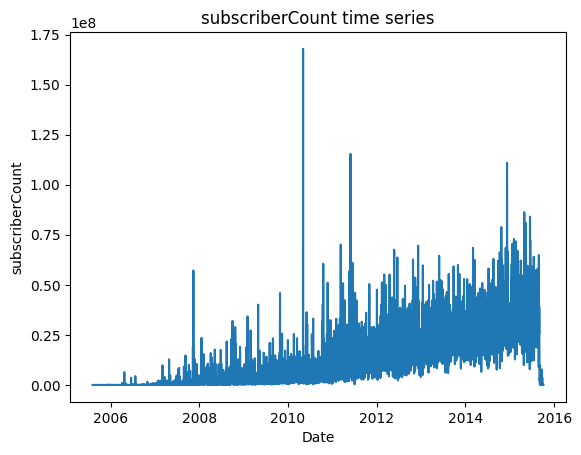

In [146]:
#Adding date column and plotting subscriberCount as function of date
data['Date'] = data['videoPublished'].dt.date
df_gb_date = data.groupby('Date')['subscriberCount'].sum().reset_index()

date = df_gb_date['Date']
subcount = df_gb_date['subscriberCount']
plt.plot(date, subcount)
plt.xlabel('Date')
plt.ylabel('subscriberCount')
plt.title('subscriberCount time series')
plt.show()

We can see that there is kind of noise around 2010. It is interesting to check , but due to time issues, we won't be able to explore this.

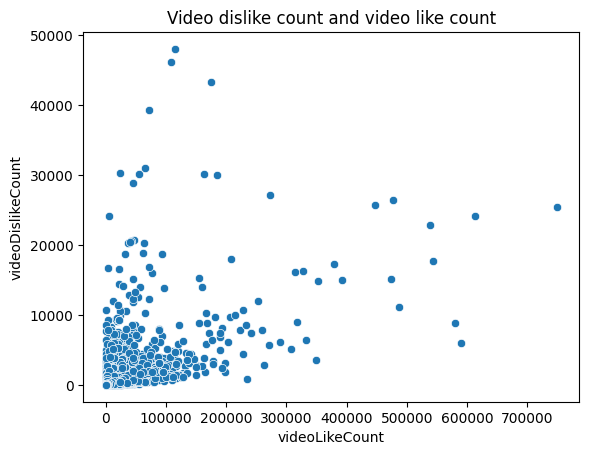

The correlation between videoLikeCount and videoDislikeCount is 0.5985266168057549


In [161]:
#Scatter plot of the likes and dislikes of videos with less than 750000 likes and 50000 dislikes
likes = data[(data['videoLikeCount'] < 750000) & (data['videoDislikeCount'] < 50000)]['videoLikeCount']
dislikes = data[(data['videoLikeCount'] < 750000) & (data['videoDislikeCount'] < 50000)]['videoDislikeCount']
sns.scatterplot(x=likes, y=dislikes)
plt.title("Video dislike count and video like count")
plt.show()
print(f'The correlation between videoLikeCount and videoDislikeCount is {likes.corr(dislikes)}')

We can see that as expected, videos with lots of dislikes have less likes and vice versa

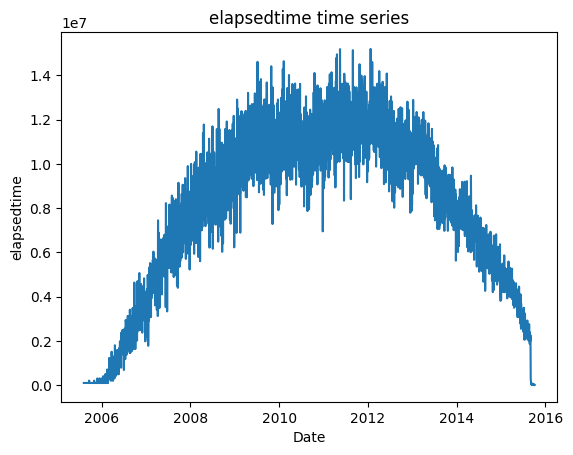

In [153]:
#Elapsed time (user time used watching videos) as function of date
df_gb_date = data.groupby('Date')['elapsedtime'].sum().reset_index()
date = df_gb_date['Date']
elapsed = df_gb_date['elapsedtime']
plt.plot(date, elapsed)
plt.xlabel('Date')
plt.ylabel('elapsedtime')
plt.title('elapsedtime time series')
plt.show()

It seems like in 2008 to 2014 there were the most spent watching videos on YouTube. but we will see soon what this is biased

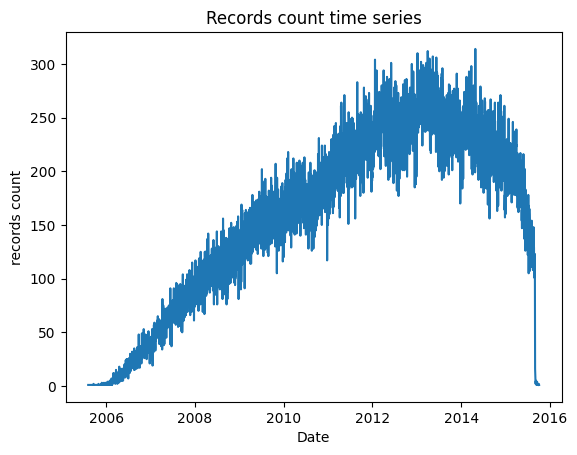

In [162]:
#Records number as a function of time
df_gb_date = data.groupby('Date')['channelId'].agg(['count']).reset_index()
date = df_gb_date['Date']
count = df_gb_date['count']
plt.plot(date, count)
plt.xlabel('Date')
plt.ylabel('records count')
plt.title('Records count time series')
plt.show()

We can see that we got less videos of the years 2015-2016 and that's why we got the previous results

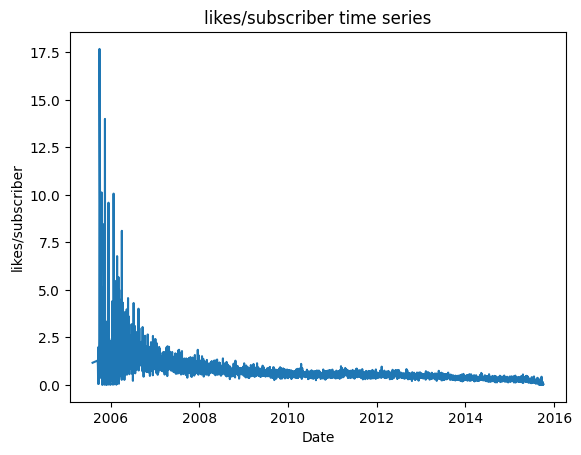

In [164]:
#Like/subscribers ratio as function of time
likesub = 'likes/subscriber'
df_gb_date = data[data[likesub] < 20].groupby('Date')[likesub].mean().reset_index()

x = df_gb_date['Date']
y = df_gb_date[likesub]
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel(likesub)
plt.title(likesub + ' time series')
plt.show()

We can assume that in 2006-2008 there were more likes than subscribers. and since then the likes and subscribes began to be more and more equal

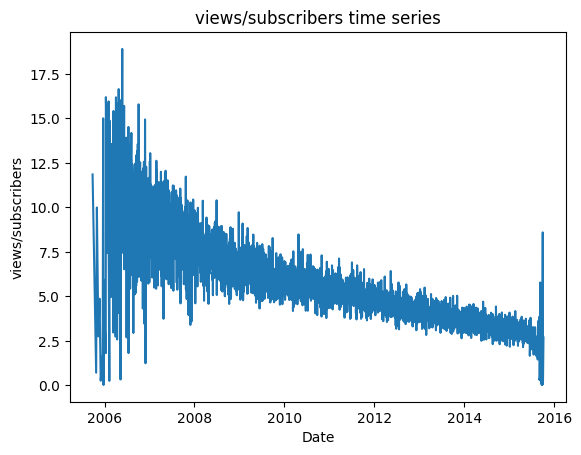

In [159]:
#views/subscribers ratio as function of time
viewsub = 'views/subscribers'
df_gb_date = data[data[viewsub] < 20].groupby('Date')[viewsub].mean().reset_index()

x = df_gb_date['Date']
y = df_gb_date[viewsub]
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel(viewsub)
plt.title(viewsub + ' time series')
plt.show()

We can see that through time, the difference between the viewers number and subscribers number got smaller. It can be because we don't have enough data of videos that were uploaded in 2015-2016